## Домашнее задание 3 (10 баллов)

### О задании

В этом домашнем задании вы получите опыт подготовки данных и EDA (Exploratory Data Analysis), приблизившись к реальной работе с данными с помощью уже знакомых вам инструментов: numpy, pandas, matplotlib и seaborn.

Вы будет работать с задачей кредитного скоринга (оценка надёжности клиента). Предоставляются данные о 1000 клиентов, про которых известно около 20 признаков и положительная или отрицательная оценка в качестве кредитуемого. Эти данные нужно будет подготовить, исследовать (в том числе с помощью средств визуализации) и даже попробовать предложить какую-нибудь формулу для условной оценки надёжности клиентов исходя из предоставленных данных. Описание данных:
https://www.rdocumentation.org/packages/evtree/versions/1.0-8/topics/GermanCredit

Каждый построенный график необходимо красиво оформить - для этого требуется как минимум указать его название, а также отметить, что изображено по каждой из осей.
Также по каждому графику ожидается небольшой комментарий с выводами.

*Функции, которые могут пригодиться при оформлении графиков: `.show()`, `.title()`, `.xlabel()`, `.ylabel()`*

In [24]:
import pandas as pd

### Задание 1 (0.0 балла)

Прочитайте средствами pandas файл с данными по ссылке https://raw.githubusercontent.com/hse-ds/iad-intro-ds/master/2022/homeworks/hw03-EDA/german_credit.csv. Выведите базовое представление таблицы (первые 5 и последние 5 строк, размер).

In [25]:
data = pd.read_csv('https://raw.githubusercontent.com/hse-ds/iad-intro-ds/master/2022/homeworks/hw03-EDA/german_credit.csv', sep=',')
print('Размер таблицы:', data.shape)
print('Количество строк:', data.shape[0])
print('Количество столбцов:', data.shape[1])
print('Начало таблицы выглядит следующим образом:')
data.head(5) #Вывели начало таблицы и размеры, конец ниже

Размер таблицы: (1000, 21)
Количество строк: 1000
Количество столбцов: 21
Начало таблицы выглядит следующим образом:


,status,duration,credit_history,purpose,amount,savings,employment_duration,installment_rate,personal_status_sex,other_debtors,...,property,age,other_installment_plans,housing,number_credits,job,people_liable,telephone,foreign_worker,credit_risk
0,no checking account,18,all credits at this bank paid back duly,car (used),1049,unknown/no savings account,< 1 yr,< 20,female : non-single or male : single,none,...,car or other,21,none,for free,1,skilled employee/official,0 to 2,no,no,good
1,no checking account,9,all credits at this bank paid back duly,others,2799,unknown/no savings account,1 <= ... < 4 yrs,25 <= ... < 35,male : married/widowed,none,...,unknown / no property,36,none,for free,2-3,skilled employee/official,3 or more,no,no,good
2,... < 0 DM,12,no credits taken/all credits paid back duly,retraining,841,... < 100 DM,4 <= ... < 7 yrs,25 <= ... < 35,female : non-single or male : single,none,...,unknown / no property,23,none,for free,1,unskilled - resident,0 to 2,no,no,good
3,no checking account,12,all credits at this bank paid back duly,others,2122,unknown/no savings account,1 <= ... < 4 yrs,20 <= ... < 25,male : married/widowed,none,...,unknown / no property,39,none,for free,2-3,unskilled - resident,3 or more,no,yes,good
4,no checking account,12,all credits at this bank paid back duly,others,2171,unknown/no savings account,1 <= ... < 4 yrs,< 20,male : married/widowed,none,...,car or other,38,bank,rent,2-3,unskilled - resident,0 to 2,no,yes,good


In [26]:
print('Конец таблицы выглядит следующим образом:')
data.tail(5) 

Конец таблицы выглядит следующим образом:


,status,duration,credit_history,purpose,amount,savings,employment_duration,installment_rate,personal_status_sex,other_debtors,...,property,age,other_installment_plans,housing,number_credits,job,people_liable,telephone,foreign_worker,credit_risk
995,no checking account,24,no credits taken/all credits paid back duly,furniture/equipment,1987,unknown/no savings account,1 <= ... < 4 yrs,25 <= ... < 35,male : married/widowed,none,...,unknown / no property,21,none,for free,1,unskilled - resident,3 or more,no,no,bad
996,no checking account,24,no credits taken/all credits paid back duly,others,2303,unknown/no savings account,>= 7 yrs,< 20,male : married/widowed,co-applicant,...,unknown / no property,45,none,rent,1,skilled employee/official,0 to 2,no,no,bad
997,... >= 200 DM / salary for at least 1 year,21,all credits at this bank paid back duly,others,12680,... >= 1000 DM,>= 7 yrs,< 20,male : married/widowed,none,...,real estate,30,none,own,1,manager/self-empl./highly qualif. employee,0 to 2,yes (under customer name),no,bad
998,... < 0 DM,12,no credits taken/all credits paid back duly,furniture/equipment,6468,... >= 1000 DM,unemployed,25 <= ... < 35,male : married/widowed,none,...,real estate,52,none,rent,1,manager/self-empl./highly qualif. employee,0 to 2,yes (under customer name),no,bad
999,no checking account,30,no credits taken/all credits paid back duly,car (used),6350,... >= 1000 DM,>= 7 yrs,< 20,male : married/widowed,none,...,car or other,31,none,rent,1,skilled employee/official,0 to 2,no,no,bad


### Задание 2 (0.5 балла)

Определите, есть ли пропуски в данных. Разделите признаки на количественные, бинарные, порядковые и категориальные.

In [27]:
Nan_kol=data.isnull().sum().sum() #Сначала проверили, есть ли пропуски (isnull), потом посчитали их кол-во для каждого признака (sum), потом посчитали их количество в целом (вторая sum)
if Nan_kol==0:
  print('В таблице нет пропущенных значений')
else:
  print("В таблице есть пропущенные значения. Их количество равно", Nan_kol)

В таблице нет пропущенных значений


In [28]:
Bin_prizn=[] #Бинарные признаки
Kol_prizn=[] #Количественные признаки
Por_prizn=[] #Порядковые признаки
Kateg_prizn=[] #Категориальные признаки
priznak=data.columns #Вытащили все названия столбцов
for i in priznak:
  i=str(i)
  if len(data[i].unique())==2: #Если в признаке 2 значения - относим его к бинарным 
    Bin_prizn+=[i]
  elif data[i].dtype=='int64': #Если значения имеют числовой тип - к количественным
    Kol_prizn+=[i]
  elif i=='job' or i=='property': #Эти признаки, как мне кажется, можно отнести к порядковым (хотя возможно и к категориальным)
    Por_prizn+=[i]                #моя логика была в том, что мы все-таки можем сравнить группы людей по наличию имущества и занимаемой должности (выстроить определнную иерархию)
  else:
    for x in data[i].unique():
      if ">" in x or "<" in x: #Отбираем порядковые признаки, если они имеют символы сравнения > или < (значения находятся в определнных промежтках), то мы можем упорядочить эти промежутки
        Por_prizn+=[i]
        break
    if i not in Por_prizn:
      Kateg_prizn+=[i] #Все, что осталось относим к категориальным признакам
print('Бинарные признаки:')
print(*Bin_prizn, sep=', ')
print('Количественные признаки:')
print(*Kol_prizn, sep=', ')
print('Порядковые признаки:')
print(*Por_prizn, sep=', ')
print('Категориальные признаки:')
print(*Kateg_prizn, sep=', ')

Бинарные признаки:
people_liable, telephone, foreign_worker, credit_risk
Количественные признаки:
duration, amount, age
Порядковые признаки:
status, savings, employment_duration, installment_rate, present_residence, property, number_credits, job
Категориальные признаки:
credit_history, purpose, personal_status_sex, other_debtors, other_installment_plans, housing


### Задание 3 (0.5 балла)

Выведите среднюю сумму кредита (колонка amount) в каждой категории (колонка purpose), воспользовавшись методом groupby.

In [29]:
print('Средняя сумма кредита в каждой из категорий:')
data.groupby(by='purpose')['amount'].mean() #Группируем по purpose, среднее ищем для amount

Средняя сумма кредита в каждой из категорий:


purpose
business               8209.333333
car (new)              5370.223301
car (used)             3066.983425
domestic appliances    2728.090909
furniture/equipment    2487.685714
others                 3062.948718
radio/television       1498.000000
repairs                3180.400000
retraining             4158.041237
vacation               1205.888889
Name: amount, dtype: float64

### Задание 4 (0.5 балла)


Какой процент клиентов моложе 30 лет (колонка age) снимает жилье (колонка housing)? А какой процент клиентов старше 40 лет снимает жилье?

In [30]:
young_rent = data.loc[(data["age"]<30) & (data["housing"]=='rent')].shape[0] #Количество молодежи, снимающей жилье, ищем через shape, так как data.loc даст нам датафрейм => надо найти количество строк
print('Процент клиентов моложе 30 лет, снимающих жилье:', (young_rent*100)/(data.loc[(data["age"]<30)].shape[0]), '%') #Делим на общее кол-во молодых людей
old_rent = data.loc[(data["age"]>40) & (data["housing"]=='rent')].shape[0] #Кол-во клиентов старше 40, снимающих жилье
print('Процент клиентов старше 40 лет, снимающих жилье:', (old_rent*100)/(data.loc[(data["age"]>40)].shape[0]), '%') #Делим на общее кол-во людей страше 40

Процент клиентов моложе 30 лет, снимающих жилье: 66.66666666666667 %
Процент клиентов старше 40 лет, снимающих жилье: 68.01470588235294 %


### Задание 5 (0.5 балла)

 У скольких иностранцев (foreign_worker) число кредитов (number_credits) больше 3?

In [31]:
data['number_credits'].unique() #узнали, что возможны значения 4-5 или >= 6
foreign_credit_45 = data.loc[(data["foreign_worker"]=='yes')&(data["number_credits"]=='4-5')].shape[0] #посчитала значения 4-5 по кредиту
foreign_credit_6 = data.loc[(data["foreign_worker"]=='yes') & (data["number_credits"]=='>= 6')].shape[0] #посчитала значения >=6 по кредиту
print('Количество иностранцев, у которых число кредитов больше 3:', foreign_credit_45+foreign_credit_6)

Количество иностранцев, у которых число кредитов больше 3: 1


### Задание 6 (1 балл)

In [32]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

Используя numpy и matplotlib, начнём с тренировки: постройте график функций $sin(x)$ и $cos(x)$ от $-\pi$ до $\pi$ из 100 точек c легендой и сеткой. Используйте для линий разные цвета, одна из них пусть будет пунктирной. Результат в этом и следующих заданиях на построение графиков должен получиться примерно как на картинке. Содержание подписей не должно обязательно совпадать, однако осмысленные подписи должны присутствовать на графиках.

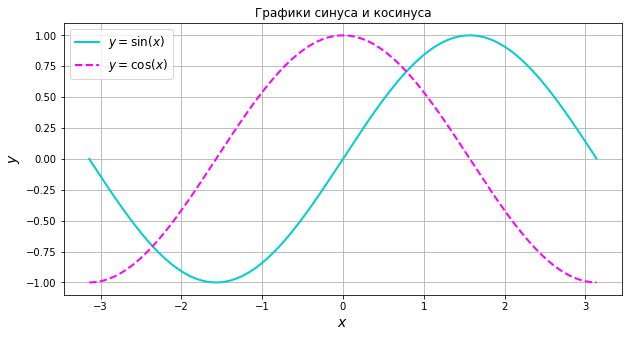

In [33]:
x = np.arange(-np.pi, np.pi, 0.01) #это значения по оси Ох
plt.figure(figsize=(10, 5)) #размер графика
plt.plot(x, np.sin(x), label=r'$y=\sin(x)$', color = 'darkturquoise', linewidth = 2) #график синуса + подпись для легенды + ширина линии
plt.plot(x, np.cos(x), label=r'$y=\cos(x)$', linestyle = '--', #график косинуса+подпись для легенды+пунктир + ширина линии
        linewidth = 2,
        color = 'magenta')
plt.grid(True) #сетка
plt.legend(loc='best', fontsize=12) #легенда, ее размер и положение
plt.xlabel(r'$x$', fontsize=14) #подпись оси х
plt.ylabel(r'$y$', fontsize=14) #подпись оси у
plt.title(r'Графики синуса и косинуса') #название
plt.show()

### Задание 7 (1 балл)

Рассмотрим сравнительное количество положительных и отрицательных кейсов в зависимости от размера текущего счёта. Постройте зеркальные горизонтальные гистограммы.

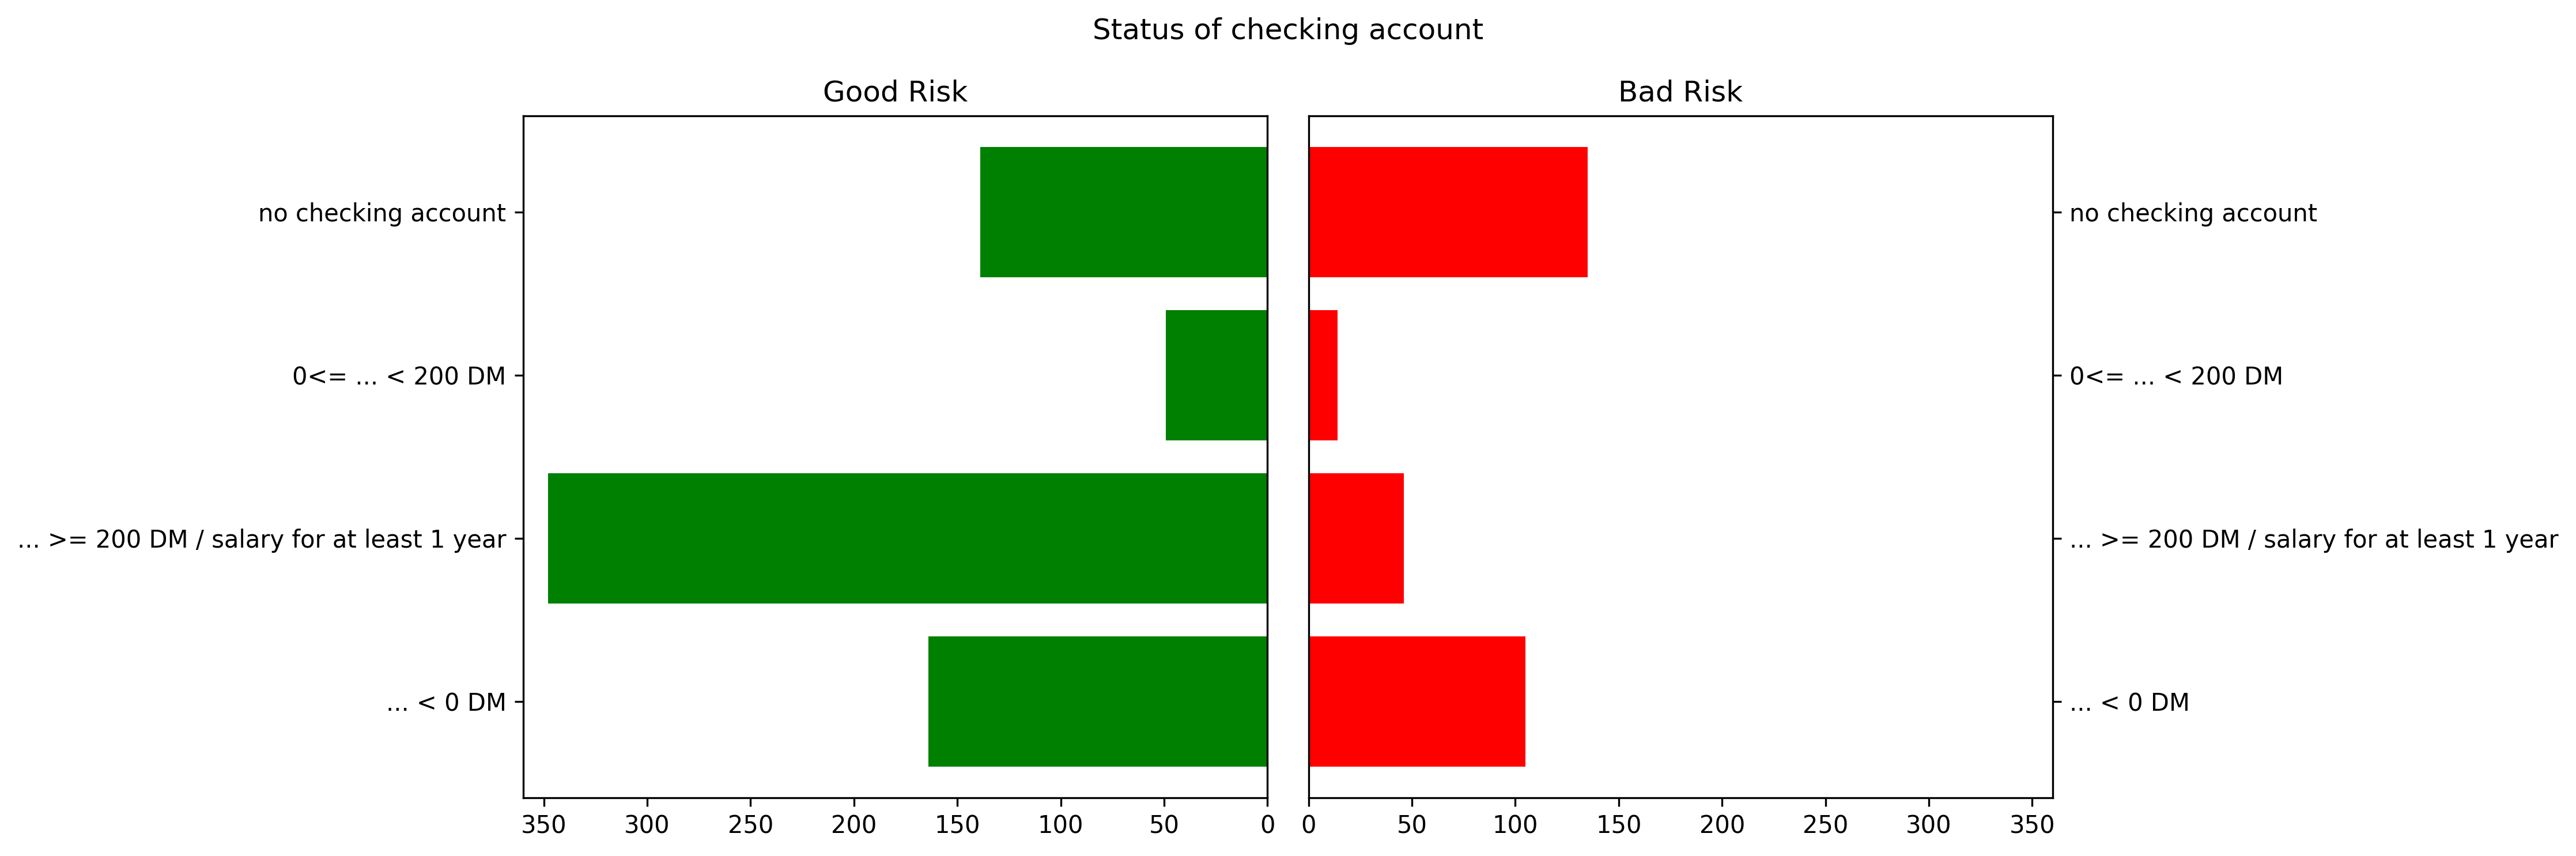

In [36]:
data['index'] = data.index #для удобства подсчета кейсов добавим индексы
fig, axs = plt.subplots(1, 2,  figsize=(15, 5), dpi=300) #2 графика
fig.suptitle("Status of checking account")
axs[0].set_title("Good Risk")
axs[0].set_xlim([360, 0]) #меняем направление оси Ох, чтобы она шла от 360 к 0
axs[0].barh(sorted(data.status.unique()),data.loc[(data["credit_risk"]=='good')].groupby("status")["index"].nunique(),color='g') #1 - это значения, тк loc далее считает их по порядку, используем sorted, 2- ситаем кол-во good risk по уникальным индексам
axs[1].set_title("Bad Risk")
axs[1].set_xlim([0, 360])
axs[1].yaxis.tick_right() #зеркалим значения по оси Оу, чтобы они были справа
axs[1].barh(sorted(data.status.unique()),data.loc[(data["credit_risk"]=='bad')].groupby("status")["index"].nunique(),color='r')
fig. tight_layout () #расстояние между графиками делаем меньше 
plt.show()
#Выводы:
#Очень высокая надежность у клиентов со статусом >=200 DM, как общая, так и сравнительная в данной категории
#Очень мало людей имеют статус между 0 и 200 DM, но в этой категории высокая надежность клиентов раза в 3-4 больше, чем плохая надежность
#Поровну распределены категории надежности у статуса "no checking account", людей из такой категории, вероятно, нужно сравнивать по другим признакам
#Статус <0 DM тоже особо ничего не говорит о надежности клиента, так как количество надежных и ненадежных клиентов не сильно отличается 

In [37]:
data=data.drop(columns='index')#уберем индексы, которые выше добавили для задания

### Задание 8  (0.5 балла)

In [38]:
import seaborn as sns

Теперь постройте гистограмму для сравнения количества положительных и отрицательных кейсов в зависимости от размера сберегательного счёта с помощью seaborn. Какой способ вам больше нравится с точки зрения трудоёмкости написания кода? А с точки зрения восприятия результата?

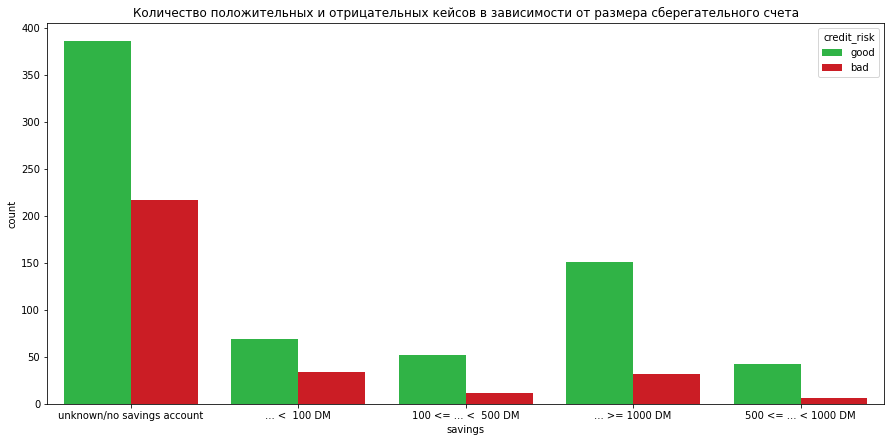

In [39]:
plt.figure(figsize=(15, 7))
plt.title(r'Количество положительных и отрицательных кейсов в зависимости от размера сберегательного счета')
colors = sns.color_palette('bright')[ 2:5 ] #Не нашла нужную палетку, поэтому взяла bright с 3 цвета
sns.countplot(x="savings", hue="credit_risk", data=data, palette = colors) #Гистограмма сравнения, столбцы (hue) по риску, по у автоматически считаются значения в каждой категории (тк countplot)
plt.show()
#Выводы:
#Самое большое количество надежных клиентов принадлежат категории 'unknown', поэтому клиентов с такой категорией стоит сравнивать по другим признакам (не по savings)
#Самое большое сравнительное количество надежных клиентов относительно ненадежных внутри категорий >= 100 DM, 100<=...<=500 DM и 500<=...<1000 DM
#Категория ... <100 DM не очень подходит для определения надежности клиента, так как количество надежных и ненадежных клиентов в этой категории не сильно отличаются 
# С точки зрения трудоемкости мне больше нравится sns, однако трудно было разобраться с палеткой (если нужны конкретные цвета, а такой палетки нет, в matplotlib можно задать конкретные цвета)
#Результат в matplotlib мне нравится больше (визуально)

### Задание 9  (1 балл)

seaborn легко позволяет добавить ещё больше информации на один график. Для каждого размера сберегательного счёта мы можем оценить не только количество положительных и отрицательных кейсов, но и их распределение по возрасту, например. Постройте подходящую для этого визуализацию.

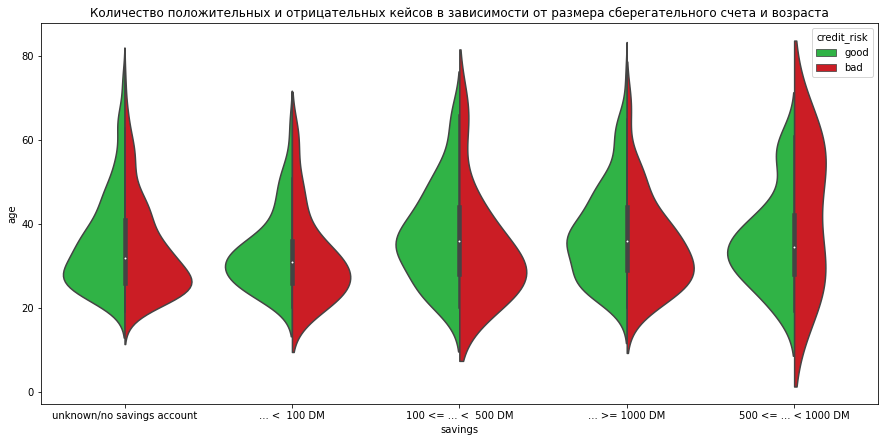

In [40]:
plt.figure(figsize=(15, 7))
plt.title(r'Количество положительных и отрицательных кейсов в зависимости от размера сберегательного счета и возраста')
colors = sns.color_palette('bright')[ 2:5 ]
sns.violinplot(x='savings', y='age', data=data, hue="credit_risk", split=True, palette = colors) #split объединяет графики в каждой категории в один
plt.show()
#Выводы:
#В основном во всех категориях надежные клиенты в возрасте около 30 лет (ненадежные тоже)
#В категории 500<=...<1000 DM количество ненадежных клиентов распределено практически равномерно по возрасту

### Задание 10  (0.5 балла)

Заканчивая с гистограммами, посмотрим на распределение положительных и отрицательных кейсов по возрастам, разместив их друг над другом. Добавим распределение всех взятых кредитов.

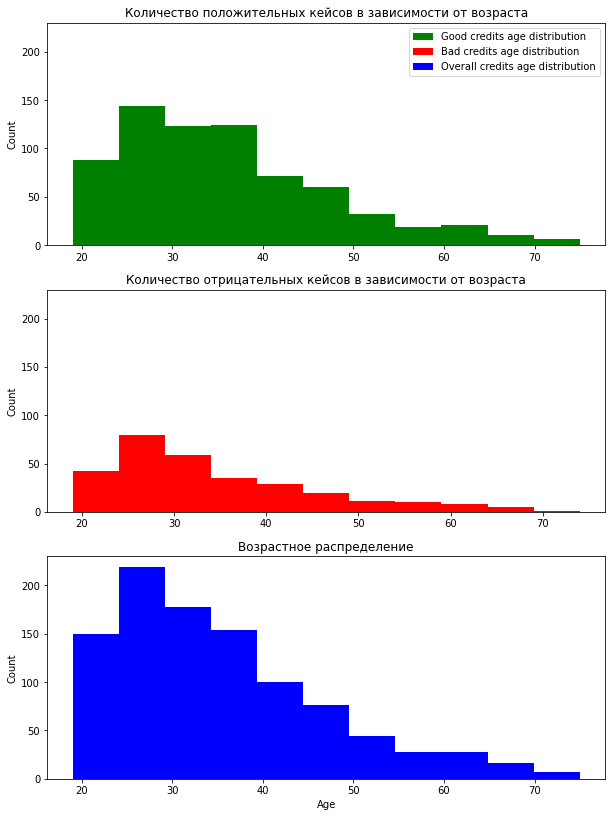

In [41]:
fig=plt.figure(figsize=(10, 12))
plt.subplot(3, 1, 1)
plt.hist(
    [data["age"][data['credit_risk']=='good']], bins= 11,color='g', label='Good credits age distribution',);
plt.ylim(0,230,0.50)
plt.yticks([0, 50, 100, 150, 200])
plt.title(r'Количество положительных кейсов в зависимости от возраста')
plt.ylabel(r'Count', fontsize=10)
plt.subplots_adjust(top= 1 ) #Отступы

plt.subplot(3, 1, 2)
plt.hist(
    [data["age"][data['credit_risk']=='bad']], bins= 11,color='r', label='Bad credits age distribution');
plt.ylim(0,230,0.50)
plt.yticks([0, 50, 100, 150, 200])
plt.title(r'Количество отрицательных кейсов в зависимости от возраста')
plt.ylabel(r'Count', fontsize=10)
plt.subplots_adjust(top= 1 )

plt.subplot(3, 1, 3)
plt.hist(
    data["age"], bins= 11,color='b', label='Overall credits age distribution');
plt.ylim(0,230,0.50)
plt.yticks([0, 50, 100, 150, 200])
plt.title(r'Возрастное распределение')
plt.ylabel(r'Count', fontsize=10)
plt.xlabel(r'Age', fontsize=10)
fig.legend(bbox_to_anchor=(0, 0.9, 0.9, .10)) #Подобрала координаты легенды, чтобы она не накрывала название графика
plt.show()
#Выводы:
#В основном надежные клиенты находятся в возрасте от 20 до 40 лет, пик приходится на 25-30 лет
#Между 30 и 40 надежные клиенты распределены равномерно
#Для ненадежных клиентов пик приходится тоже на возраст 25-30, после 40 постепенно снижается
#Это можно объяснить скошенностью выборочных данных в сторону 20-40 лет, большое количество клиентов находятся именно в этом возрасте

### Задание 11  (0.5 балла)

Не менее полезной иногда может быть диаграмма рассеяния. Постройте такую диаграмму с продолжительностью и размерами кредитов в качестве осей. Обозначьте положительные и отрицательные кейсы разными цветами.

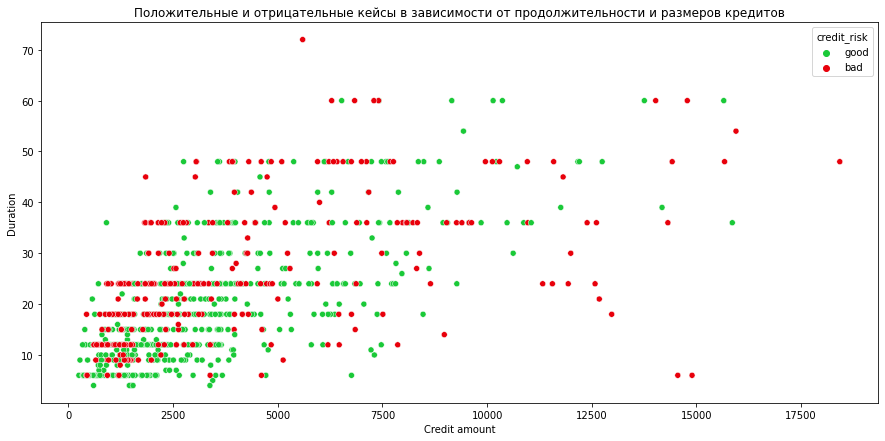

In [42]:
plt.figure(figsize=(15, 7))
plt.title(r'Положительные и отрицательные кейсы в зависимости от продолжительности и размеров кредитов')
colors = sns.color_palette('bright')[ 2:4 ]
sns.scatterplot(data=data, x="amount", y="duration", hue="credit_risk", palette = colors)
plt.xlabel(r'Credit amount', fontsize=10)
plt.ylabel(r'Duration', fontsize=10)
plt.show()
#Выводы: 
# Большое количество надежных клиентов сосредоточено между показателями от 0 до 3500 в категории credit amount и от 5 до 15 в duration
# Очень много отрицательных кейсов в показателях 25 и 18-19 категории duration
# В категории credit amount с показателем от 11000 до 20000 кейсы в основном отрицательные
# Почти все кейсы положительные при 2000-2500 в credit amount и 5 в duration

### Задание 12  (1 балл)

Продвинемся глубже. Постройте 3D версию диаграммы рассеяния, добавив ось с возрастом.

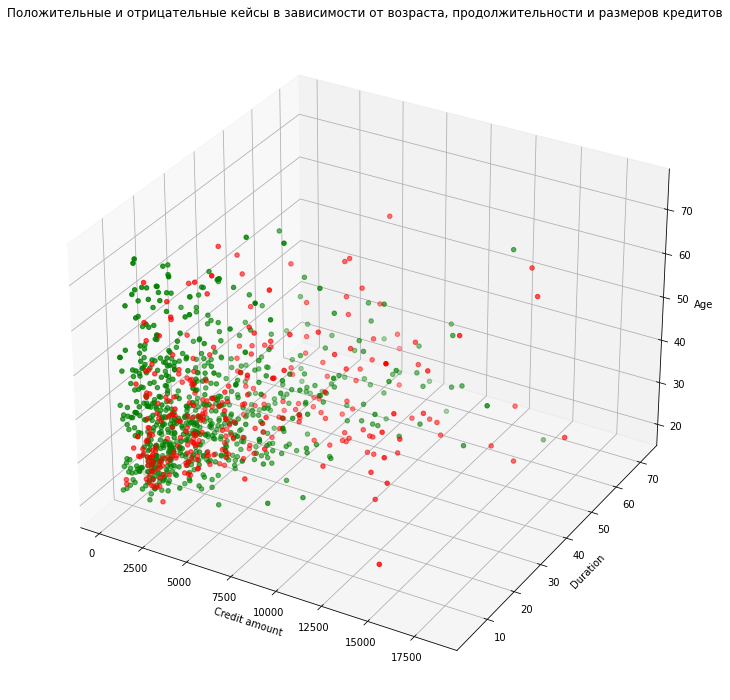

In [43]:
 fig = plt.figure(figsize=(12, 13)) 
 
 ax = fig.add_subplot(111, projection = '3d') 
 ax.scatter([data["amount"][data['credit_risk']=='bad']], [data['duration'] [data['credit_risk']=='bad']], [data['age'] [data['credit_risk']=='bad']], c='r')
 ax.scatter([data["amount"][data['credit_risk']=='good']], [data['duration'] [data['credit_risk']=='good']], [data['age'] [data['credit_risk']=='good']], c='g')
 
 ax.set_xlabel("Credit amount") 
 ax.set_ylabel("Duration") 
 ax.set_zlabel("Age") 
 plt.title(r'Положительные и отрицательные кейсы в зависимости от возраста, продолжительности и размеров кредитов')
 plt.show() 
 #Выводы: 
 #Как мы видели раньше, возраст клиентов в основном от 20 до 40 лет, из-за этого очень большое количество положительных и отрицательных кейсов именно в этом возрасте
 #При небольшом показателе duration и credit amount  с повышением возраста становится больше положительных кейсов
 #С увеличением duration и credit amount растет количество отрицательных кейсов

### Задание 13  (0.5 балла)

Представьте все порядковые и бинарные признаки в виде числовых значений {0, ..., n - 1}, где n это количество значений признака. Избавьтесь от категориальных признаков.

In [44]:
#Создам словарь, где закодирую все значения, логика примерно такая: чем "лучше" значение, тем меньше его номер
Dict_helper={'... < 0 DM':1, '0<= ... < 200 DM':0, '... >= 200 DM / salary for at least 1 year':2, 'no checking account':3, #Из графика ранее посмторели как примерно распределены кейсы, поэтому 0 ставлю для признака от 0 до 200 DM
             '... <  100 DM':3, '100 <= ... <  500 DM':1, '500 <= ... < 1000 DM': 0 , '... >= 1000 DM':2, 'unknown/no savings account':4, #Такая же логика, смотрю по графику выше, лучшее сравнительное значение у категорий между 100 и 500 DM
                'unemployed':4, '... < 1 year':3, '1 <= ... < 4 years':2, '4 <= ... < 7 years':1,  '... >= 7 years':0, #Логика: чем больше работает, тем выше шанс выплатить кредит
              '< 20':0, '25 <= ... < 35':1, '20 <= ... < 25':2, '>= 35':3, #Логика: чем больше ставка, тем ниже вероятность выплатить кредит (тк это сделать сложнее)
              '>= 7 yrs':0, '1 <= ... < 4 yrs':1, '4 <= ... < 7 yrs':2, '< 1 yr':3, #Имущественная отвественность (дольше живет на постоянном месте - выше шанс что не уедет куда-то и выплатит кредит)
              'car or other':1, 'unknown / no property':3, 'building soc. savings agr./life insurance':2 , 'real estate':0, #Тоже иерархия по имуществу
             '1':0, '2-3':1, '4-5':2, '>= 6':3, #Логика: меньше кредитов - легче выплатить
              'skilled employee/official':1, 'unskilled - resident':2,
       'unemployed/unskilled - non-resident':3, 'manager/self-empl./highly qualif. employee':0, #Логика: выше должность - выше вероятность выплатить кредит
      '0 to 2':0, '3 or more':1, 'yes (under customer name)':1, 'no':0, 'yes':1, 'good':1, 'bad':0} #Тут бинарные, для оценки надежности логика меньше-лучше не подошла
for i in Bin_prizn:
  data[i]=data[i].apply(lambda b: Dict_helper[b])
for i in Por_prizn:
  data[i]=data[i].apply(lambda b: Dict_helper[b])
for i in Kateg_prizn:
  data=data.drop(columns=i)
data

,status,duration,amount,savings,employment_duration,installment_rate,present_residence,property,age,number_credits,job,people_liable,telephone,foreign_worker,credit_risk
0,3,18,1049,4,3,0,0,1,21,0,1,0,0,0,1
1,3,9,2799,4,1,1,1,3,36,1,1,1,0,0,1
2,1,12,841,3,2,1,0,3,23,0,2,0,0,0,1
3,3,12,2122,4,1,2,1,3,39,1,2,1,0,1,1
4,3,12,2171,4,1,0,0,1,38,1,2,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,24,1987,4,1,1,0,3,21,0,2,1,0,0,0
996,3,24,2303,4,0,0,3,3,45,0,1,0,0,0,0
997,2,21,12680,2,0,0,0,0,30,0,0,0,1,0,0
998,1,12,6468,2,4,1,3,0,52,0,0,0,1,0,0


In [45]:
# Можно сделать так, если задание заключается в том, чтобы просто заменить значения на числа, но я сделаю с помощью словаря, чтобы потом использовать числа для формулы в 14 задании
#for i in Bin_prizn:
#  znacheniya=sorted(list(data[i].unique()))
#  data[i]=data[i].apply(lambda b: znacheniya.index(b))
#for i in Por_prizn:
#  znacheniya=sorted(list(data[i].unique()))
#  data[i]=data[i].apply(lambda b: znacheniya.index(b))
#for i in Kateg_prizn:
#  data=data.drop(columns=i)
#data

### Задание 14  (2 балла)

По результатам предыдущего задания у вас должна получиться таблица, в которой все признаки так или иначе представлены числовыми значениями. Попробуйте придумать на основе проведённых исследований данных какую-нибудь формулу, связывающую целевую переменную с признаками, не используя готовых инструментов машинного обучения. По желанию вы можете исключить ещё какие-то признаки, или, наоборот, сформировать новые на основе имеющихся. Возможно, вы захотите отмасштабировать большие наборы численных значений некоторых признаков с помощью интервалов. Цель: реализовать функцию, которая будет принимать на вход набор признаков для объекта выборки и возвращать прогноз целевой переменной (0 или 1). Например, вы можете просто сложить все признаки и возращать ноль, если сумма отрицательная, а в противном случае единицу. Но наверняка можно придумать лучше!
Данные уже разделены на набор для обучения, который вы можете использовать как угодно, и тестовый, на котором нужно будет проверить вашу точность. Постарайтесь достичь точности хотя бы 0.6.

In [46]:
#Уберу столбец, который, по моему мнению, особо не влияет на надежность клиента
data=data.drop(columns=['telephone'])
amount_mean=data.amount.mean()
amount_kv_otkl=data.amount.std( ) 
data['amount']=data['amount'].apply(lambda b: (b-amount_mean)/amount_kv_otkl) #amount слишком большой, я здесь нормализовала данные
data

,status,duration,amount,savings,employment_duration,installment_rate,present_residence,property,age,number_credits,job,people_liable,foreign_worker,credit_risk
0,3,18,-0.787263,4,3,0,0,1,21,0,1,0,0,1
1,3,9,-0.167301,4,1,1,1,3,36,1,1,1,0,1
2,1,12,-0.860950,3,2,1,0,3,23,0,2,0,0,1
3,3,12,-0.407137,4,1,2,1,3,39,1,2,1,1,1
4,3,12,-0.389779,4,1,0,0,1,38,1,2,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,24,-0.454963,4,1,1,0,3,21,0,2,1,0,0
996,3,24,-0.343016,4,0,0,3,3,45,0,1,0,0,0
997,2,21,3.333184,2,0,0,0,0,30,0,0,0,0,0
998,1,12,1.132495,2,4,1,3,0,52,0,0,0,0,0


In [47]:
# Здесь получилась доля верных ответов 0.712, ниже попытаюсь еще поменять коэффициенты, но этот код оставлю (коэффициенты в матрице подбирала +- от их возможного влияния на надежность, особой формулы нет)
def predict(Xtest: np.array) -> np.array:
  predskazanie=np.array([])
  matrix_coef=np.array([-1.5, -0.4, -0.1, -1 , -2, -0.02, 0.03, -1.5, 0.03, -1, -2, -0.01, -0.01 ])
  for i in Xtest:
    Vector_koef=i*matrix_coef
    pred=np.sum(Vector_koef)
    if pred>=-30:
      predskazanie= np.append(predskazanie, [1])
    else:
      predskazanie= np.append(predskazanie, [0])
  return predskazanie

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
X = data.drop('credit_risk', 1).values
y = data['credit_risk'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=10)

print('Доля правильных ответов на обучающей выборке:', accuracy_score(y_train, predict(X_train)))

accuracy_score(y_test, predict(X_test)) 

Доля правильных ответов на обучающей выборке: 0.728


<ipython-input-47-d33e991140ae>:16: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  X = data.drop('credit_risk', 1).values


0.712

In [48]:
#Вот здесь доля чуть выше - 7.2, но вот на обучающей выборке ниже
def predict(Xtest: np.array) -> np.array:
  predskazanie=np.array([])
  matrix_coef=np.array([-0.3, -0.1, 1, -0.2 , -0.3, -0.02, -0.09, -0.4, 0.04, -0.2, -0.5, -0.1, -0.001 ])
  for i in Xtest:
    Vector_koef=i*matrix_coef
    pred=np.sum(Vector_koef)
    if pred>=-5:
      predskazanie= np.append(predskazanie, [1])
    else:
      predskazanie= np.append(predskazanie, [0])
  return predskazanie

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
X = data.drop('credit_risk', 1).values
y = data['credit_risk'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=10)

print('Доля правильных ответов на обучающей выборке:', accuracy_score(y_train, predict(X_train)))

accuracy_score(y_test, predict(X_test)) 

Доля правильных ответов на обучающей выборке: 0.6906666666666667


<ipython-input-48-c41563945fcb>:16: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  X = data.drop('credit_risk', 1).values


0.72